In [1]:
# Setting up packages

!pip install scikit-learn
!pip install graphviz
!pip install -U dtreeviz
!pip install pydotplus


In [2]:
import dtreeviz
import graphviz
import pydotplus

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [11]:
# csv file
data = pd.read_csv('./../data/combined_dataset.csv')

data=data[data['ALCOHOL'].notna()]

# Define substance_abuse on thresholds
AlcoholAbuse_threshold = 300
DrugAbuse_threshold = 500

def categorize_substance_abuse(row):
    if row['ALCOHOL'] > AlcoholAbuse_threshold and row['DRUG'] > DrugAbuse_threshold:
        return "High"
    elif row['ALCOHOL'] > AlcoholAbuse_threshold or row['DRUG'] > DrugAbuse_threshold:
        return "Moderate"
    else:
        return "Low"

# Add new column "Substance Abuse" based on the criteria
data['Substance_Abuse'] = data.apply(categorize_substance_abuse, axis=1)

# Define categories in 'Substance Abuse'
class_names = ['Low', 'Moderate', 'High']

In [12]:
#Defining target
target = data['Substance_Abuse']

features = data[['DEPRESS']]




In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [14]:
#Encoding data to handle categoricals
label_encoder = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])


In [15]:

#fitting data to model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [16]:
#Encoding data to handle categoricals
label_encoder = LabelEncoder()
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = label_encoder.fit_transform(X_test[col])

In [17]:
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)

print(f"Accuracy: {score * 100:.2f}%")


Accuracy: 93.45%


In [18]:
# Doing more evaluation metrics
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        21
         Low       0.94      0.99      0.97      2273
    Moderate       0.00      0.00      0.00       119

    accuracy                           0.93      2413
   macro avg       0.31      0.33      0.32      2413
weighted avg       0.89      0.93      0.91      2413

Confusion Matrix:
[[   0   21    0]
 [   2 2255   16]
 [   0  119    0]]


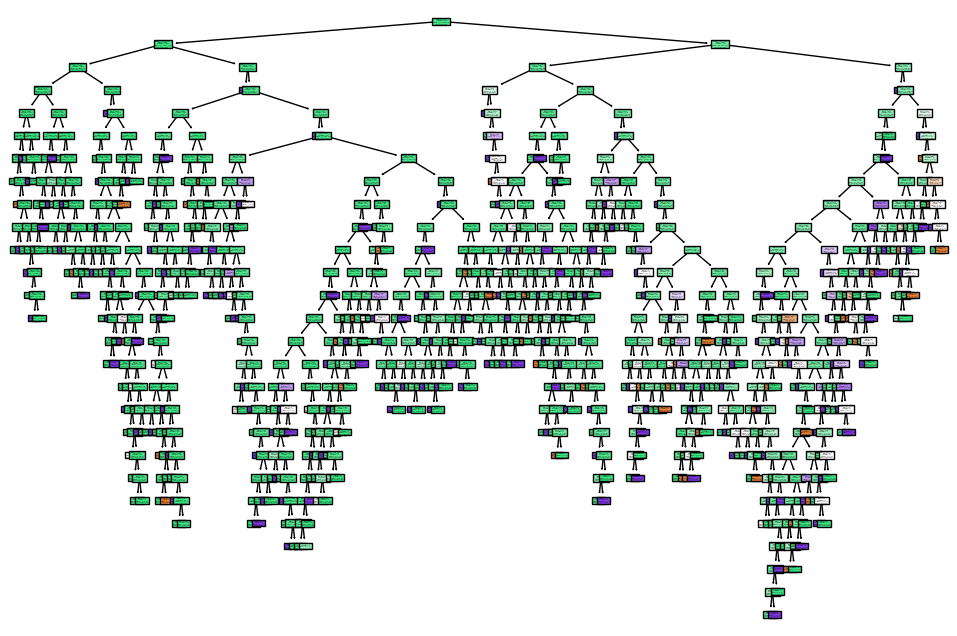

InvocationException: GraphViz's executables not found

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['DEPRESS'], class_names=class_names)
plt.show()

# The Decision Tree in Graphviz format
dot_data = export_graphviz(model, out_file=None,
                           feature_names=['DEPRESS'],
                           class_names=class_names,
                           filled=True, rounded=True)

# Display the graph image of the decision tree
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
Image(graph.create_png())

